In [ ]:
!pip install scikit-learn==1.3.0 numpy==1.24.3 threadpoolctl==3.1.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 80.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 32.9 MB/s eta 0:00:00
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 3.6.0
    Uninstalling threadpoolctl-3.6.0:
      Successfully uninstalled threadpoolctl-3.6.0
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.3 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.3

In [ ]:
# Download require libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('Train.csv')
df_test = pd.read_csv('Test.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

display(df.head(5))
display(df_test.head(5))


,Origin Airport Code,Destination Airport Code,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Great Circle Distance,Timezone Difference,Continent Origin,Continent Destination,Route Popularity,Flight_Distance
0,ORG754,DST883,-0.283823,-43.312707,38.508357,24.024226,8076.863942,1,South America,Europe,397,8120.606391
1,ORG301,DST627,25.954354,82.253018,40.630074,145.859627,6000.224245,11,Asia,Asia,650,5998.108994
2,ORG501,DST681,1.386828,-81.540082,1.265511,82.773779,18246.263830,9,South America,Asia,655,18207.572270
3,ORG310,DST812,23.367517,34.904649,-24.384679,121.948601,10777.984860,-2,Africa,Australia,740,10813.850260
4,ORG608,DST878,3.328282,-16.364917,40.396593,45.871911,7442.778451,-2,Africa,Asia,173,7426.288895


,Origin Airport Code,Destination Airport Code,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Great Circle Distance,Timezone Difference,Continent Origin,Continent Destination,Route Popularity,Flight_Distance
0,ORG505,DST811,23.961737,-9.132258,-11.939821,118.007422,14299.108830,4,Africa,Australia,707,NaN
1,ORG962,DST897,-31.608154,-70.013348,58.773542,-96.174442,10338.292880,-2,South America,North America,62,NaN
2,ORG250,DST735,68.182636,-57.411336,47.805394,-122.086745,4157.006160,-4,North America,North America,137,NaN
3,ORG773,DST210,61.895925,-12.118972,-17.194037,152.557524,14901.176340,-9,Europe,Australia,714,NaN
4,ORG682,DST368,35.380647,-23.815483,57.343073,136.035111,9532.806882,-4,Europe,Asia,769,NaN


In [ ]:
df.shape

(19800, 12)

In [ ]:
df_test.shape

(200, 12)

In [ ]:
train_data_var_check = df.drop(columns = ['Flight_Distance'], axis =1).select_dtypes(include=[np.number]).var(axis =0)
test_data_var_check = df_test.drop(columns = ['Flight_Distance'], axis =1). select_dtypes(include=[np.number]).var(axis =0)

variance_ratio = train_data_var_check/test_data_var_check

variance_df = pd.DataFrame({'Feature': train_data_var_check.index, 'Train_Variance': train_data_var_check.values, 'Test_Variance': test_data_var_check.values, 'Variance_Ratio': variance_ratio.values})

display(variance_df)

,Feature,Train_Variance,Test_Variance,Variance_Ratio
0,Origin Latitude,1.194998e+03,1.368839e+03,0.873001
1,Origin Longitude,7.585915e+03,7.994200e+03,0.948927
2,Destination Latitude,1.208241e+03,1.211055e+03,0.997676
3,Destination Longitude,7.679968e+03,8.109210e+03,0.947067
4,Great Circle Distance,1.994078e+07,1.952713e+07,1.021183
5,Timezone Difference,5.248483e+01,5.060239e+01,1.037201
6,Route Popularity,8.373517e+04,8.460389e+04,0.989732


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19800 entries, 0 to 19799
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Origin Airport Code       19800 non-null  object 
 1   Destination Airport Code  19800 non-null  object 
 2   Origin Latitude           19800 non-null  float64
 3   Origin Longitude          19800 non-null  float64
 4   Destination Latitude      19800 non-null  float64
 5   Destination Longitude     19800 non-null  float64
 6   Great Circle Distance     19800 non-null  float64
 7   Timezone Difference       19800 non-null  int64  
 8   Continent Origin          19800 non-null  object 
 9   Continent Destination     19800 non-null  object 
 10  Route Popularity          19800 non-null  int64  
 11  Flight_Distance           19800 non-null  float64
dtypes: float64(6), int64(2), object(4)
memory usage: 1.8+ MB


In [ ]:
df.describe()

,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Great Circle Distance,Timezone Difference,Route Popularity,Flight_Distance
count,19800.000000,19800.000000,19800.000000,19800.000000,19800.000000,19800.000000,19800.000000,19800.000000
mean,13.028959,15.510501,12.828559,16.015789,9381.925584,-0.019949,500.831364,9381.825044
std,34.568745,87.097157,34.759755,87.635427,4465.510407,7.244641,289.370306,4465.911625
min,-54.960126,-169.997474,-54.958503,-169.979246,27.852369,-12.000000,1.000000,12.374404
25%,-18.519178,-55.595058,-18.703066,-54.926946,5921.496173,-6.000000,249.000000,5918.139295
50%,15.935886,15.594596,15.594577,15.700158,9489.546474,0.000000,502.000000,9489.917386
75%,43.835839,96.294855,43.798860,99.674920,12789.827235,6.000000,751.000000,12795.005312
max,69.998685,159.985565,69.997400,159.984764,19916.009680,12.000000,1000.000000,19963.921530


In [ ]:
df['delta_lat'] = df['Destination Latitude'] - df['Origin Latitude']
df['delta_long'] = df['Destination Longitude'] - df['Origin Longitude']
df.head()

,Origin Airport Code,Destination Airport Code,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Great Circle Distance,Timezone Difference,Continent Origin,Continent Destination,Route Popularity,Flight_Distance,delta_lat,delta_long
0,ORG754,DST883,-0.283823,-43.312707,38.508357,24.024226,8076.863942,1,South America,Europe,397,8120.606391,38.792181,67.336933
1,ORG301,DST627,25.954354,82.253018,40.630074,145.859627,6000.224245,11,Asia,Asia,650,5998.108994,14.675720,63.606609
2,ORG501,DST681,1.386828,-81.540082,1.265511,82.773779,18246.263830,9,South America,Asia,655,18207.572270,-0.121316,164.313861
3,ORG310,DST812,23.367517,34.904649,-24.384679,121.948601,10777.984860,-2,Africa,Australia,740,10813.850260,-47.752196,87.043952
4,ORG608,DST878,3.328282,-16.364917,40.396593,45.871911,7442.778451,-2,Africa,Asia,173,7426.288895,37.068311,62.236828


In [ ]:
df_test['delta_lat'] = df_test['Destination Latitude'] - df_test['Origin Latitude']
df_test['delta_long'] = df_test['Destination Longitude'] - df_test['Origin Longitude']
df_test.head()

,Origin Airport Code,Destination Airport Code,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Great Circle Distance,Timezone Difference,Continent Origin,Continent Destination,Route Popularity,Flight_Distance,delta_lat,delta_long
0,ORG505,DST811,23.961737,-9.132258,-11.939821,118.007422,14299.108830,4,Africa,Australia,707,NaN,-35.901558,127.139679
1,ORG962,DST897,-31.608154,-70.013348,58.773542,-96.174442,10338.292880,-2,South America,North America,62,NaN,90.381696,-26.161094
2,ORG250,DST735,68.182636,-57.411336,47.805394,-122.086745,4157.006160,-4,North America,North America,137,NaN,-20.377242,-64.675409
3,ORG773,DST210,61.895925,-12.118972,-17.194037,152.557524,14901.176340,-9,Europe,Australia,714,NaN,-79.089961,164.676496
4,ORG682,DST368,35.380647,-23.815483,57.343073,136.035111,9532.806882,-4,Europe,Asia,769,NaN,21.962426,159.850594


In [ ]:
df.columns = df.columns.str.strip().str.replace(r'\s+', '_', regex = True)
df

,Origin_Airport_Code,Destination_Airport_Code,Origin_Latitude,Origin_Longitude,Destination_Latitude,Destination_Longitude,Great_Circle_Distance,Timezone_Difference,Continent_Origin,Continent_Destination,Route_Popularity,Flight_Distance,delta_lat,delta_long
0,ORG754,DST883,-0.283823,-43.312707,38.508357,24.024226,8076.863942,1,South America,Europe,397,8120.606391,38.792181,67.336933
1,ORG301,DST627,25.954354,82.253018,40.630074,145.859627,6000.224245,11,Asia,Asia,650,5998.108994,14.675720,63.606609
2,ORG501,DST681,1.386828,-81.540082,1.265511,82.773779,18246.263830,9,South America,Asia,655,18207.572270,-0.121316,164.313861
3,ORG310,DST812,23.367517,34.904649,-24.384679,121.948601,10777.984860,-2,Africa,Australia,740,10813.850260,-47.752196,87.043952
4,ORG608,DST878,3.328282,-16.364917,40.396593,45.871911,7442.778451,-2,Africa,Asia,173,7426.288895,37.068311,62.236828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19795,ORG257,DST217,6.169843,55.681304,41.538110,-74.229463,12672.419630,1,Asia,North America,614,12673.502580,35.368267,-129.910767
19796,ORG352,DST118,-13.022933,146.569487,-25.897320,6.774359,13878.993730,-9,Australia,Africa,223,13845.275600,-12.874387,-139.795128
19797,ORG972,DST644,51.140373,39.177953,59.931967,46.398271,1076.524546,12,Europe,Europe,888,1084.612058,8.791595,7.220318
19798,ORG232,DST473,68.152522,-22.037636,52.406055,-1.512814,2062.385033,-11,Europe,Europe,646,2074.864074,-15.746467,20.524822


In [ ]:
df_test.columns = df_test.columns.str.strip().str.replace(r'\s+', '_', regex = True)
df_test

,Origin_Airport_Code,Destination_Airport_Code,Origin_Latitude,Origin_Longitude,Destination_Latitude,Destination_Longitude,Great_Circle_Distance,Timezone_Difference,Continent_Origin,Continent_Destination,Route_Popularity,Flight_Distance,delta_lat,delta_long
0,ORG505,DST811,23.961737,-9.132258,-11.939821,118.007422,14299.108830,4,Africa,Australia,707,NaN,-35.901558,127.139679
1,ORG962,DST897,-31.608154,-70.013348,58.773542,-96.174442,10338.292880,-2,South America,North America,62,NaN,90.381696,-26.161094
2,ORG250,DST735,68.182636,-57.411336,47.805394,-122.086745,4157.006160,-4,North America,North America,137,NaN,-20.377242,-64.675409
3,ORG773,DST210,61.895925,-12.118972,-17.194037,152.557524,14901.176340,-9,Europe,Australia,714,NaN,-79.089961,164.676496
4,ORG682,DST368,35.380647,-23.815483,57.343073,136.035111,9532.806882,-4,Europe,Asia,769,NaN,21.962426,159.850594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,ORG731,DST425,21.278988,32.761159,-48.412984,-68.743478,12593.191900,-10,Africa,South America,756,NaN,-69.691973,-101.504637
196,ORG717,DST530,-54.655005,-69.760580,-28.600693,-50.868418,3271.685444,3,South America,South America,728,NaN,26.054312,18.892162
197,ORG803,DST503,-26.800650,140.391037,0.861398,-41.683273,17122.267270,8,Australia,South America,590,NaN,27.662048,-182.074309
198,ORG692,DST430,-11.924813,119.569105,20.820617,145.531748,4616.203446,12,Australia,Asia,630,NaN,32.745430,25.962643


# segregating numerical and categorical columns

In [ ]:
num_cols = df.select_dtypes(include = ['number']).columns
cat_cols = df.select_dtypes(include = ['object']).columns
cat_cols_2 = df.drop(columns = ['Origin_Airport_Code', 'Destination_Airport_Code'], axis = 1). select_dtypes(include = ['object']).columns

# Basic EDA

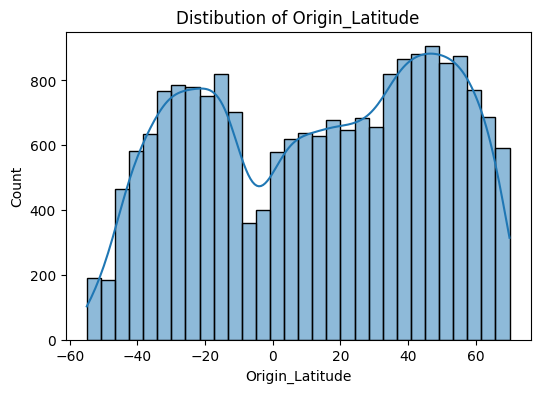

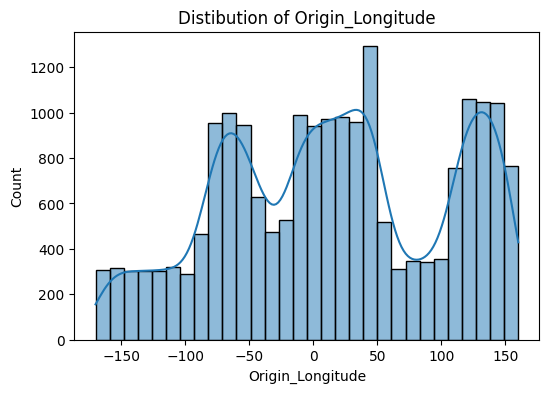

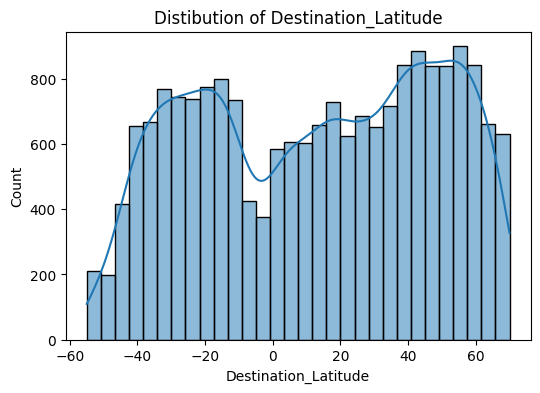

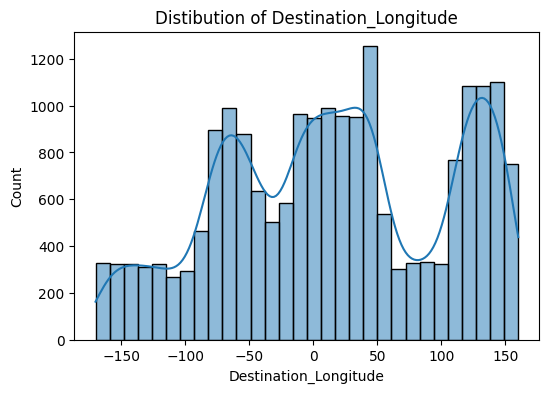

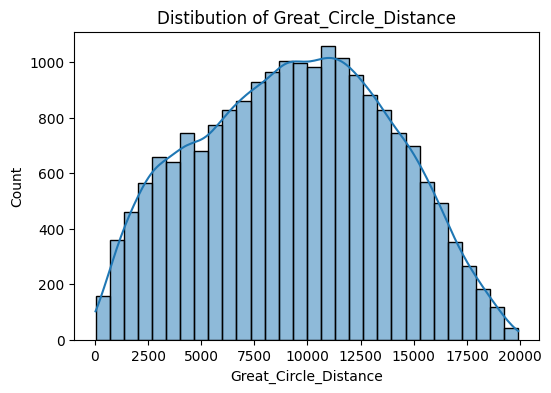

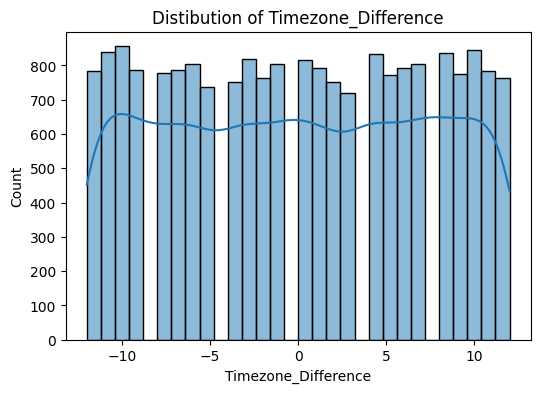

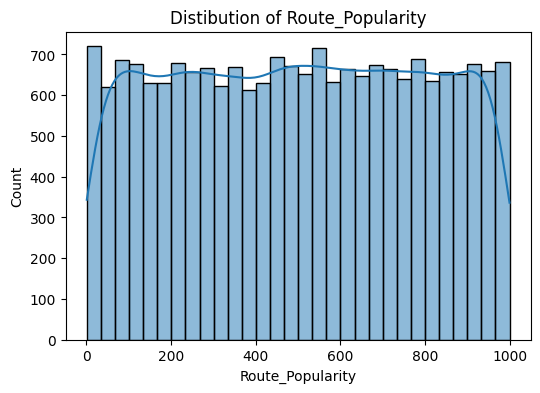

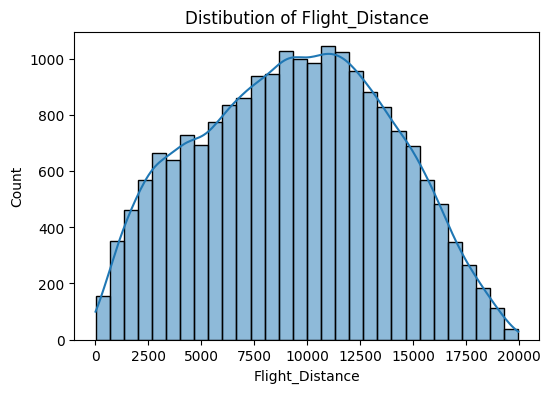

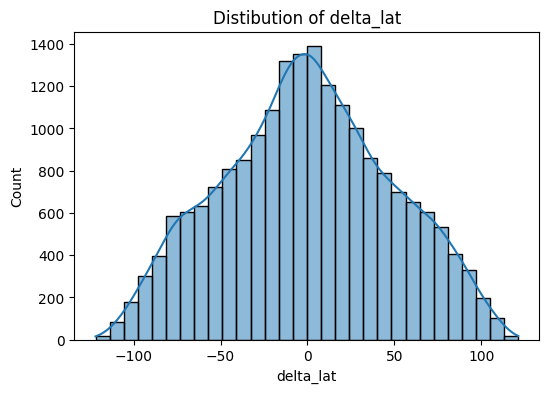

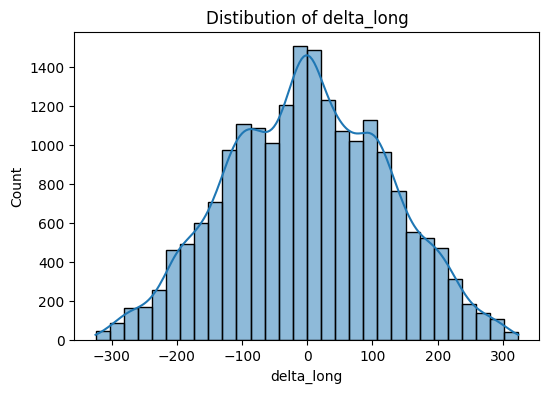

In [ ]:
#Univariate analysis
# Check the Distibution of numerical data atrributes

for col in num_cols:
  plt.figure(figsize =(6,4))
  sns.histplot(df[col], bins = 30, kde = True)
  plt.title(f'Distibution of {col}')
  plt.show()

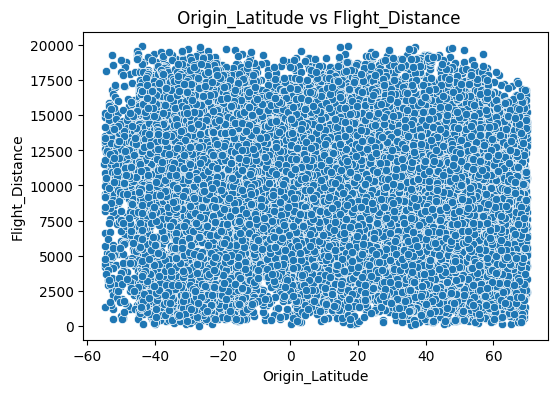

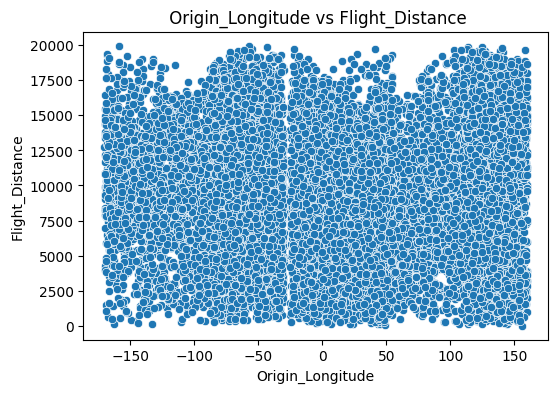

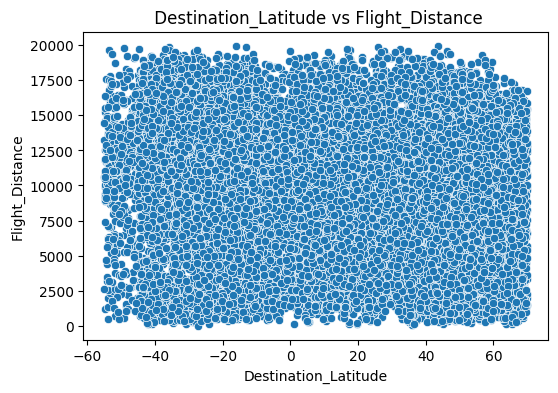

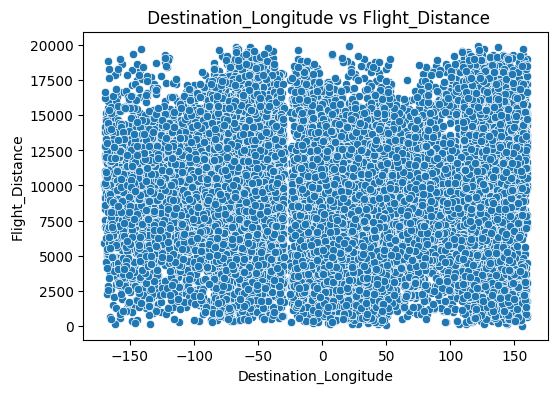

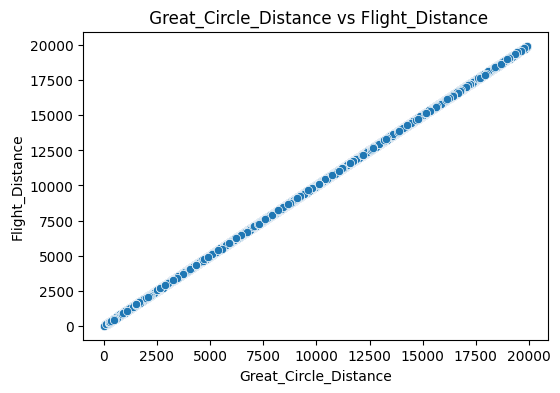

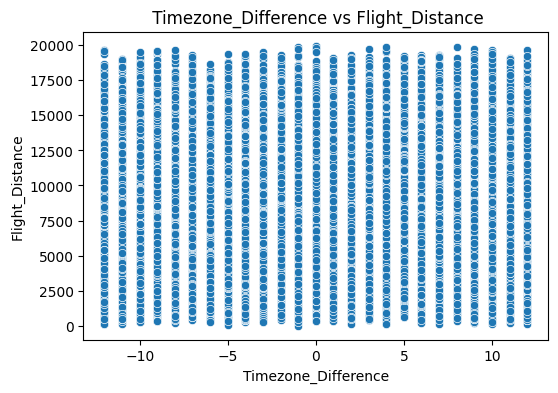

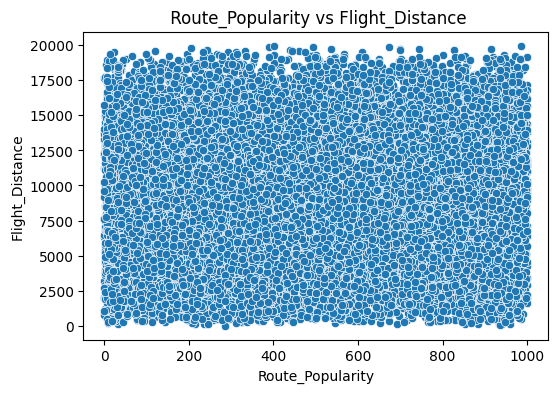

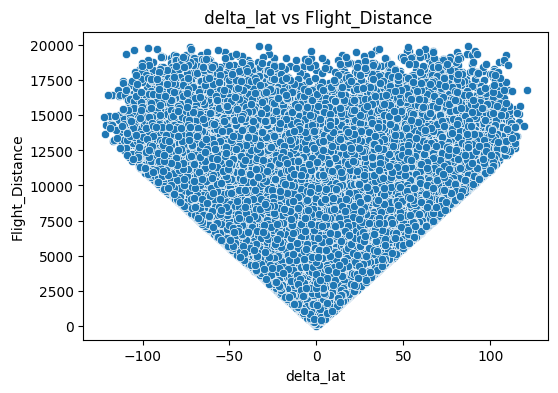

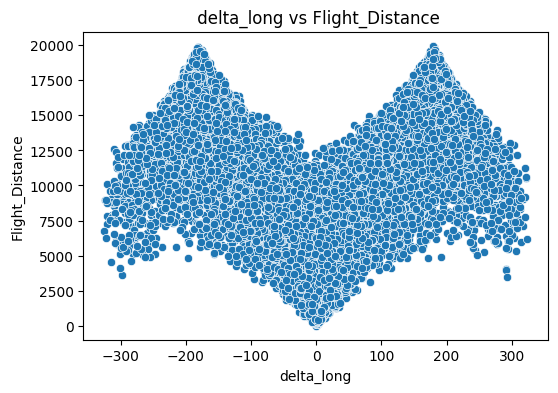

In [ ]:
# Bivariate analysis

for col in num_cols:
  if col != 'Flight_Distance':
    plt.figure(figsize =(6,4))
    sns.scatterplot(x = df[col], y = df['Flight_Distance'])
    plt.title(f' {col} vs Flight_Distance')
    plt.show()

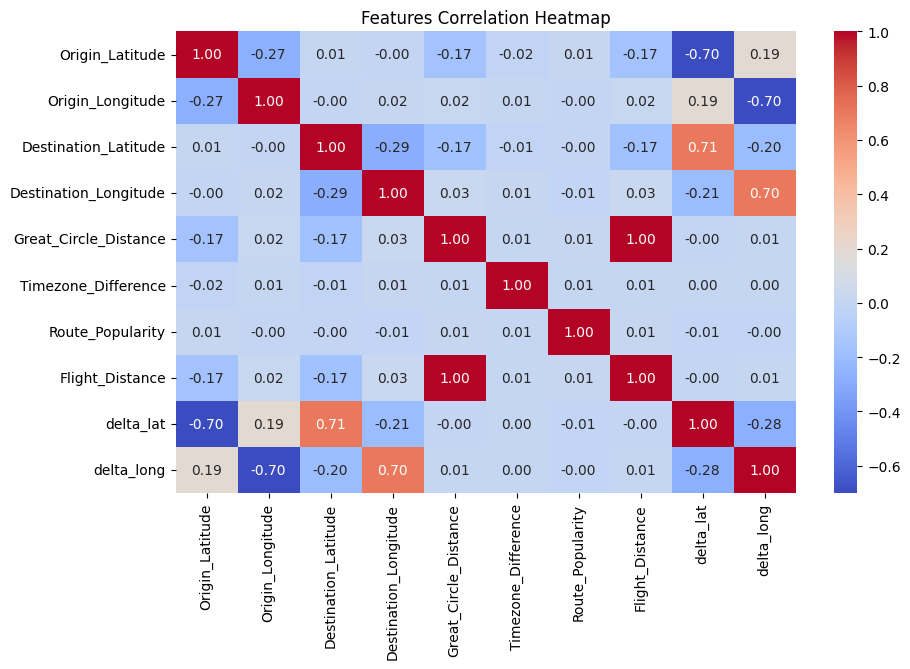

In [ ]:
plt.figure(figsize = (10,6))
sns.heatmap(df[num_cols].corr(), annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title('Features Correlation Heatmap')
plt.show()

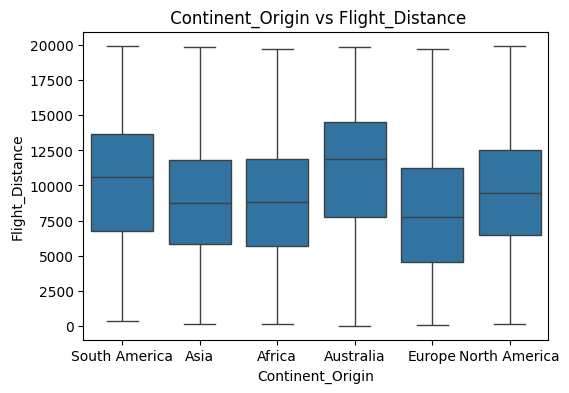

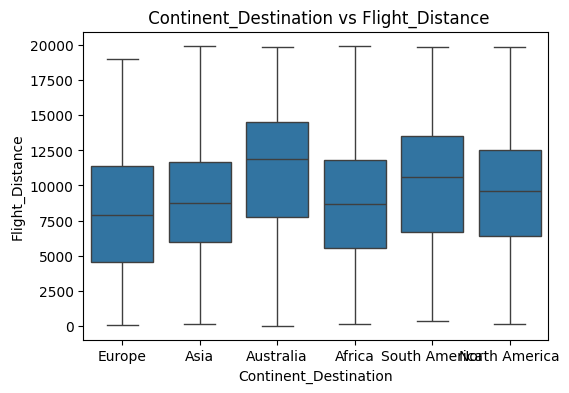

In [ ]:
# Box plots for categorical variables

for col in cat_cols_2:
  plt.figure(figsize =(6,4))
  sns.boxplot(x = df[col], y = df['Flight_Distance'])
  plt.title(f' {col} vs Flight_Distance')
  plt.show()


In [ ]:
df

,Origin_Airport_Code,Destination_Airport_Code,Origin_Latitude,Origin_Longitude,Destination_Latitude,Destination_Longitude,Great_Circle_Distance,Timezone_Difference,Continent_Origin,Continent_Destination,Route_Popularity,Flight_Distance,delta_lat,delta_long
0,ORG754,DST883,-0.283823,-43.312707,38.508357,24.024226,8076.863942,1,South America,Europe,397,8120.606391,38.792181,67.336933
1,ORG301,DST627,25.954354,82.253018,40.630074,145.859627,6000.224245,11,Asia,Asia,650,5998.108994,14.675720,63.606609
2,ORG501,DST681,1.386828,-81.540082,1.265511,82.773779,18246.263830,9,South America,Asia,655,18207.572270,-0.121316,164.313861
3,ORG310,DST812,23.367517,34.904649,-24.384679,121.948601,10777.984860,-2,Africa,Australia,740,10813.850260,-47.752196,87.043952
4,ORG608,DST878,3.328282,-16.364917,40.396593,45.871911,7442.778451,-2,Africa,Asia,173,7426.288895,37.068311,62.236828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19795,ORG257,DST217,6.169843,55.681304,41.538110,-74.229463,12672.419630,1,Asia,North America,614,12673.502580,35.368267,-129.910767
19796,ORG352,DST118,-13.022933,146.569487,-25.897320,6.774359,13878.993730,-9,Australia,Africa,223,13845.275600,-12.874387,-139.795128
19797,ORG972,DST644,51.140373,39.177953,59.931967,46.398271,1076.524546,12,Europe,Europe,888,1084.612058,8.791595,7.220318
19798,ORG232,DST473,68.152522,-22.037636,52.406055,-1.512814,2062.385033,-11,Europe,Europe,646,2074.864074,-15.746467,20.524822


# One hot encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output = False, handle_unknown = 'ignore')

# Fit on training data and transform both train and test datasets

encoded_train = encoder.fit_transform(df[cat_cols_2])
encoded_test = encoder.transform(df_test[cat_cols_2])

ohe_cols = encoder.get_feature_names_out(cat_cols_2)
df_ohe = pd.DataFrame(encoded_train, columns = ohe_cols, index = df.index)
df_test_ohe = pd.DataFrame(encoded_test, columns = ohe_cols, index = df_test.index)

df = df.drop(columns = cat_cols_2).join(df_ohe)
df_test = df_test.drop(columns = cat_cols_2).join(df_test_ohe)

In [ ]:
display(df.head())
display(df_test.head())

,Origin_Airport_Code,Destination_Airport_Code,Origin_Latitude,Origin_Longitude,Destination_Latitude,Destination_Longitude,Great_Circle_Distance,Timezone_Difference,Route_Popularity,Flight_Distance,delta_lat,delta_long,Continent_Origin_Africa,Continent_Origin_Asia,Continent_Origin_Australia,Continent_Origin_Europe,Continent_Origin_North America,Continent_Origin_South America,Continent_Destination_Africa,Continent_Destination_Asia,Continent_Destination_Australia,Continent_Destination_Europe,Continent_Destination_North America,Continent_Destination_South America
0,ORG754,DST883,-0.283823,-43.312707,38.508357,24.024226,8076.863942,1,397,8120.606391,38.792181,67.336933,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,ORG301,DST627,25.954354,82.253018,40.630074,145.859627,6000.224245,11,650,5998.108994,14.675720,63.606609,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,ORG501,DST681,1.386828,-81.540082,1.265511,82.773779,18246.263830,9,655,18207.572270,-0.121316,164.313861,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,ORG310,DST812,23.367517,34.904649,-24.384679,121.948601,10777.984860,-2,740,10813.850260,-47.752196,87.043952,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,ORG608,DST878,3.328282,-16.364917,40.396593,45.871911,7442.778451,-2,173,7426.288895,37.068311,62.236828,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


,Origin_Airport_Code,Destination_Airport_Code,Origin_Latitude,Origin_Longitude,Destination_Latitude,Destination_Longitude,Great_Circle_Distance,Timezone_Difference,Route_Popularity,Flight_Distance,delta_lat,delta_long,Continent_Origin_Africa,Continent_Origin_Asia,Continent_Origin_Australia,Continent_Origin_Europe,Continent_Origin_North America,Continent_Origin_South America,Continent_Destination_Africa,Continent_Destination_Asia,Continent_Destination_Australia,Continent_Destination_Europe,Continent_Destination_North America,Continent_Destination_South America
0,ORG505,DST811,23.961737,-9.132258,-11.939821,118.007422,14299.108830,4,707,NaN,-35.901558,127.139679,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,ORG962,DST897,-31.608154,-70.013348,58.773542,-96.174442,10338.292880,-2,62,NaN,90.381696,-26.161094,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,ORG250,DST735,68.182636,-57.411336,47.805394,-122.086745,4157.006160,-4,137,NaN,-20.377242,-64.675409,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,ORG773,DST210,61.895925,-12.118972,-17.194037,152.557524,14901.176340,-9,714,NaN,-79.089961,164.676496,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,ORG682,DST368,35.380647,-23.815483,57.343073,136.035111,9532.806882,-4,769,NaN,21.962426,159.850594,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# First Model

In [ ]:
X = df.drop(columns = ['Flight_Distance', 'Origin_Airport_Code', 'Destination_Airport_Code', 'delta_lat','delta_long'])
y = df['Flight_Distance']

X_test = df_test.copy()
X_test = X_test[X.columns]

In [ ]:
X

,Origin_Latitude,Origin_Longitude,Destination_Latitude,Destination_Longitude,Great_Circle_Distance,Timezone_Difference,Route_Popularity,Continent_Origin_Africa,Continent_Origin_Asia,Continent_Origin_Australia,Continent_Origin_Europe,Continent_Origin_North America,Continent_Origin_South America,Continent_Destination_Africa,Continent_Destination_Asia,Continent_Destination_Australia,Continent_Destination_Europe,Continent_Destination_North America,Continent_Destination_South America
0,-0.283823,-43.312707,38.508357,24.024226,8076.863942,1,397,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,25.954354,82.253018,40.630074,145.859627,6000.224245,11,650,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.386828,-81.540082,1.265511,82.773779,18246.263830,9,655,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,23.367517,34.904649,-24.384679,121.948601,10777.984860,-2,740,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,3.328282,-16.364917,40.396593,45.871911,7442.778451,-2,173,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19795,6.169843,55.681304,41.538110,-74.229463,12672.419630,1,614,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19796,-13.022933,146.569487,-25.897320,6.774359,13878.993730,-9,223,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
19797,51.140373,39.177953,59.931967,46.398271,1076.524546,12,888,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
19798,68.152522,-22.037636,52.406055,-1.512814,2062.385033,-11,646,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
# Train-validation-split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Model training and evaluation

def base_models():
  models = dict()
  models["rf"] = RandomForestRegressor()
  models["dtree"] = DecisionTreeRegressor()
  models["etree"] = ExtraTreesRegressor()
  models["gbm"] = GradientBoostingRegressor()
  models["adaboost"] = AdaBoostRegressor()
  models["xgb"] = XGBRegressor()
  models["lgbm"] = LGBMRegressor()
  return models

In [ ]:
models = base_models()

for name, model in models.items():
  model.fit(X_train, y_train)
  preds = model.predict(X_val)
  mse = mean_squared_error(y_val, preds)
  rmse = np.sqrt(mse)
  print(f'{name} RMSE: {rmse}')

rf RMSE: 31.886567595641758
dtree RMSE: 42.43348291676087
etree RMSE: 32.580344847999044
gbm RMSE: 46.48334830239471
adaboost RMSE: 265.77233169484805
xgb RMSE: 46.78542514270132
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001275 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1579
[LightGBM] [Info] Number of data points in the train set: 15840, number of used features: 19
[LightGBM] [Info] Start training from score 9408.992333
lgbm RMSE: 44.16590499013852


# Fine tuning the first Model

In [ ]:
param_grid = {
      'rf' : {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20], 'random_state': [42]},
      'dtree' : {'max_depth': [10, 20, 30], 'random_state': [42]},
      'gbm': {'n_estimators': [100,200], 'learning_rate': [0.05, 0.1], 'random_state': [42]},
      'adaboost' : {'n_estimators': [50, 100], 'random_state': [42]},
      'etree': {'n_estimators': [100, 200], 'random_state': [42]},
      'xgb' : {'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1], 'random_state': [42]},
      'lgbm' : {'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1], 'random_state': [42]}
}


In [ ]:
models = base_models()
best_models = {}
rmse_scores = {}

for name, model in models.items():
  print(f'Tuning {name}...')
  grid_search = GridSearchCV(model, param_grid[name], cv = 5, scoring = 'neg_mean_squared_error', n_jobs =-1)
  grid_search.fit(X_train, y_train)

  best_models[name] = grid_search.best_estimator_
  preds = grid_search.predict(X_val)

  mse = mean_squared_error(y_val, preds)
  rmse = np.sqrt(mse)
  rmse_scores[name] = (grid_search.best_params_, rmse)

print("\nRMSE Scores with Best Hyperparameters:")
for model, (params, rmse) in rmse_scores.items():
  print(f'{model}: RMSE = {rmse: .4f}, Best_Params = {params}')

Tuning rf...
Tuning dtree...
Tuning etree...
Tuning gbm...
Tuning adaboost...
Tuning xgb...
Tuning lgbm...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001312 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1579
[LightGBM] [Info] Number of data points in the train set: 15840, number of used features: 19
[LightGBM] [Info] Start training from score 9408.992333

RMSE Scores with Best Hyperparameters:
rf: RMSE =  30.9712, Best_Params = {'max_depth': 10, 'n_estimators': 300, 'random_state': 42}
dtree: RMSE =  34.0255, Best_Params = {'max_depth': 10, 'random_state': 42}
etree: RMSE =  32.5110, Best_Params = {'n_estimators': 200, 'random_state': 42}
gbm: RMSE =  35.1416, Best_Params = {'learning_rate': 0.05, 'n_estimators': 200, 'random_state': 42}
adaboost: RMSE =  265.3965, Best_Params = {'n_estimators': 50, 'random_state'

In [ ]:
!pip install cudf cuml dask-cudf --extra-index-url=https://pypi.nvidia.com


Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
ERROR: Could not find a version that satisfies the requirement dask-cudf (from versions: none)
ERROR: No matching distribution found for dask-cudf


Origin_Airport_Code	Destination_Airport_Code	Origin_Latitude	Origin_Longitude	Destination_Latitude	Destination_Longitude	Great_Circle_Distance	Timezone_Difference	Route_Popularity	Flight_Distance	delta_lat	delta_long	Continent_Origin_Africa	Continent_Origin_Asia	Continent_Origin_Australia	Continent_Origin_Europe	Continent_Origin_North America	Continent_Origin_South America	Continent_Destination_Africa	Continent_Destination_Asia	Continent_Destination_Australia	Continent_Destination_Europe	Continent_Destination_North America	Continent_Destination_South America

# Model using scaled_data

In [ ]:
from sklearn.preprocessing import StandardScaler

# Columns to scale

scale_cols = ['Origin_Latitude', 'Origin_Longitude' ,'Destination_Latitude', 'Destination_Longitude',  'Great_Circle_Distance', 'Timezone_Difference', 'Route_Popularity', 'delta_lat', 'delta_long']
df_scaled = df.copy()
df_test_scaled = df_test.copy()

scaler = StandardScaler()
df_scaled[scale_cols] = scaler.fit_transform(df_scaled[scale_cols])
df_test_scaled[scale_cols] = scaler.transform(df_test_scaled[scale_cols])

print(df_scaled.head())
print(df_test_scaled.head())


  Origin_Airport_Code Destination_Airport_Code  Origin_Latitude  Origin_Longitude  Destination_Latitude  Destination_Longitude  Great_Circle_Distance  Timezone_Difference  Route_Popularity  Flight_Distance  delta_lat  delta_long  Continent_Origin_Africa  Continent_Origin_Asia  Continent_Origin_Australia  Continent_Origin_Europe  Continent_Origin_North America  Continent_Origin_South America  Continent_Destination_Africa  Continent_Destination_Asia  Continent_Destination_Australia  Continent_Destination_Europe  Continent_Destination_North America  Continent_Destination_South America
0              ORG754                   DST883        -0.385120         -0.675392              0.738798               0.091386              -0.292261             0.140790         -0.358827      8120.606391   0.799190    0.545227                      0.0                    0.0                         0.0                      0.0                             0.0                             1.0                  

In [ ]:
X = df_scaled.drop(columns = ['Flight_Distance', 'Origin_Airport_Code', 'Destination_Airport_Code', 'delta_lat','delta_long'])
y = df_scaled['Flight_Distance']

X_test = df_test_scaled.copy()
X_test = X_test[X.columns]

In [ ]:
display(X.head())
display(X_test.head())

,Origin_Latitude,Origin_Longitude,Destination_Latitude,Destination_Longitude,Great_Circle_Distance,Timezone_Difference,Route_Popularity,Continent_Origin_Africa,Continent_Origin_Asia,Continent_Origin_Australia,Continent_Origin_Europe,Continent_Origin_North America,Continent_Origin_South America,Continent_Destination_Africa,Continent_Destination_Asia,Continent_Destination_Australia,Continent_Destination_Europe,Continent_Destination_North America,Continent_Destination_South America
0,-0.385120,-0.675392,0.738798,0.091386,-0.292261,0.140790,-0.358827,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.373914,0.766319,0.799839,1.481674,-0.757312,1.521156,0.515507,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-0.336791,-1.114308,-0.332665,0.761789,1.985117,1.245083,0.532786,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.299080,0.222678,-1.070611,1.208820,0.312639,-0.273319,0.826535,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.280627,-0.365985,0.793122,0.340694,-0.434261,-0.273319,-1.132942,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


,Origin_Latitude,Origin_Longitude,Destination_Latitude,Destination_Longitude,Great_Circle_Distance,Timezone_Difference,Route_Popularity,Continent_Origin_Africa,Continent_Origin_Asia,Continent_Origin_Australia,Continent_Origin_Europe,Continent_Origin_North America,Continent_Origin_South America,Continent_Destination_Africa,Continent_Destination_Asia,Continent_Destination_Australia,Continent_Destination_Europe,Continent_Destination_North America,Continent_Destination_South America
0,0.316270,-0.282941,-0.712577,1.163847,1.101175,0.554900,0.712491,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-1.291289,-0.981961,1.321820,-1.280225,0.214173,-0.273319,-1.516543,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.595518,-0.837268,1.006271,-1.575915,-1.170091,-0.549392,-1.257353,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.413653,-0.317234,-0.863739,1.558105,1.236004,-1.239575,0.736682,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.646603,-0.451530,1.280666,1.369564,0.033789,-0.549392,0.926755,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Model training and evaluation

def base_models():
  models = dict()
  models["rf"] = RandomForestRegressor()
  models["dtree"] = DecisionTreeRegressor()
  models["etree"] = ExtraTreesRegressor()
  models["gbm"] = GradientBoostingRegressor()
  models["adaboost"] = AdaBoostRegressor()
  models["xgb"] = XGBRegressor()
  models["lgbm"] = LGBMRegressor()
  return models

In [ ]:
models = base_models()

for name, model in models.items():
  model.fit(X_train, y_train)
  preds = model.predict(X_val)
  mse = mean_squared_error(y_val, preds)
  rmse = np.sqrt(mse)
  print(f'{name} RMSE: {rmse}')

rf RMSE: 31.78875181839105
dtree RMSE: 42.350938044839964
etree RMSE: 32.62799187978642
gbm RMSE: 46.4812572455566
adaboost RMSE: 271.1792838116557
xgb RMSE: 46.78542514270132
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001436 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1580
[LightGBM] [Info] Number of data points in the train set: 15840, number of used features: 19
[LightGBM] [Info] Start training from score 9408.992333
lgbm RMSE: 43.91283209124777


In [ ]:
param_grid = {
      'rf' : {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20], 'random_state': [42]},
      'dtree' : {'max_depth': [10, 20, 30], 'random_state': [42]},
      'gbm': {'n_estimators': [100,200], 'learning_rate': [0.05, 0.1], 'random_state': [42]},
      'adaboost' : {'n_estimators': [50, 100], 'random_state': [42]},
      'etree': {'n_estimators': [100, 200], 'random_state': [42]},
      'xgb' : {'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1], 'random_state': [42]},
      'lgbm' : {'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1], 'random_state': [42]}
}

best_models = {}
rmse_scores = {}

for name, model in models.items():
  print(f'Tuning {name}...')
  grid_search = GridSearchCV(model, param_grid[name], cv = 5, scoring = 'neg_mean_squared_error', n_jobs =-1)
  grid_search.fit(X_train, y_train)

  best_models[name] = grid_search.best_estimator_
  preds = grid_search.predict(X_val)

  mse = mean_squared_error(y_val, preds)
  rmse = np.sqrt(mse)
  rmse_scores[name] = (grid_search.best_params_, rmse)

print("\nRMSE Scores with Best Hyperparameters:")
for model, (params, rmse) in rmse_scores.items():
  print(f'{model}: RMSE = {rmse: .4f}, Best_Params = {params}')

Tuning rf...
Tuning dtree...
Tuning etree...
Tuning gbm...
Tuning adaboost...
Tuning xgb...
Tuning lgbm...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001477 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1580
[LightGBM] [Info] Number of data points in the train set: 15840, number of used features: 19
[LightGBM] [Info] Start training from score 9408.992333

RMSE Scores with Best Hyperparameters:
rf: RMSE =  30.9721, Best_Params = {'max_depth': 10, 'n_estimators': 300, 'random_state': 42}
dtree: RMSE =  34.0272, Best_Params = {'max_depth': 10, 'random_state': 42}
etree: RMSE =  32.4627, Best_Params = {'n_estimators': 200, 'random_state': 42}
gbm: RMSE =  35.1416, Best_Params = {'learning_rate': 0.05, 'n_estimators': 200, 'random_state': 42}
adaboost: RMSE =  265.3965, Best_Params = {'n_estimators': 50, 'random_state'

In [ ]:
final_preds = best_models['rf'].predict(X_test)
submission = pd.DataFrame({'Flight_Distance': final_preds})
submission.to_csv('submission.csv', index = False)

# Model using scaled data + delta_lat, delta_long

In [ ]:
from sklearn.preprocessing import StandardScaler

# Columns to scale

scale_cols = ['Origin_Latitude', 'Origin_Longitude' ,'Destination_Latitude', 'Destination_Longitude',  'Great_Circle_Distance', 'Timezone_Difference', 'Route_Popularity', 'delta_lat', 'delta_long']
df_scaled = df.copy()
df_test_scaled = df_test.copy()

scaler = StandardScaler()
df_scaled[scale_cols] = scaler.fit_transform(df_scaled[scale_cols])
df_test_scaled[scale_cols] = scaler.transform(df_test_scaled[scale_cols])

print(df_scaled.head())
print(df_test_scaled.head())

  Origin_Airport_Code Destination_Airport_Code  Origin_Latitude  Origin_Longitude  Destination_Latitude  Destination_Longitude  Great_Circle_Distance  Timezone_Difference  Route_Popularity  Flight_Distance  delta_lat  delta_long  Continent_Origin_Africa  Continent_Origin_Asia  Continent_Origin_Australia  Continent_Origin_Europe  Continent_Origin_North America  Continent_Origin_South America  Continent_Destination_Africa  Continent_Destination_Asia  Continent_Destination_Australia  Continent_Destination_Europe  Continent_Destination_North America  Continent_Destination_South America
0              ORG754                   DST883        -0.385120         -0.675392              0.738798               0.091386              -0.292261             0.140790         -0.358827      8120.606391   0.799190    0.545227                      0.0                    0.0                         0.0                      0.0                             0.0                             1.0                  

In [ ]:
X = df_scaled.drop(columns = ['Flight_Distance', 'Origin_Airport_Code', 'Destination_Airport_Code', 'Origin_Latitude',	'Origin_Longitude',	'Destination_Latitude',	'Destination_Longitude'])
y = df_scaled['Flight_Distance']

X_test = df_test_scaled.copy()
X_test = X_test[X.columns]

display(X.head())
display(X_test.head())

,Great_Circle_Distance,Timezone_Difference,Route_Popularity,delta_lat,delta_long,Continent_Origin_Africa,Continent_Origin_Asia,Continent_Origin_Australia,Continent_Origin_Europe,Continent_Origin_North America,Continent_Origin_South America,Continent_Destination_Africa,Continent_Destination_Asia,Continent_Destination_Australia,Continent_Destination_Europe,Continent_Destination_North America,Continent_Destination_South America
0,-0.292261,0.140790,-0.358827,0.799190,0.545227,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.757312,1.521156,0.515507,0.304900,0.514794,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.985117,1.245083,0.532786,0.001621,1.336385,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.312639,-0.273319,0.826535,-0.974620,0.706001,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.434261,-0.273319,-1.132942,0.763858,0.503619,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


,Great_Circle_Distance,Timezone_Difference,Route_Popularity,delta_lat,delta_long,Continent_Origin_Africa,Continent_Origin_Asia,Continent_Origin_Australia,Continent_Origin_Europe,Continent_Origin_North America,Continent_Origin_South America,Continent_Destination_Africa,Continent_Destination_Asia,Continent_Destination_Australia,Continent_Destination_Europe,Continent_Destination_North America,Continent_Destination_South America
0,1.101175,0.554900,0.712491,-0.731729,1.033110,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.214173,-0.273319,-1.516543,1.856567,-0.217550,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-1.170091,-0.549392,-1.257353,-0.413544,-0.531758,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.236004,-1.239575,0.736682,-1.616917,1.339343,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.033789,-0.549392,0.926755,0.454248,1.299973,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
def base_models():
  models = dict()
  models["rf"] = RandomForestRegressor()
  models["dtree"] = DecisionTreeRegressor()
  models["etree"] = ExtraTreesRegressor()
  models["gbm"] = GradientBoostingRegressor()
  models["adaboost"] = AdaBoostRegressor()
  models["xgb"] = XGBRegressor()
  models["lgbm"] = LGBMRegressor()
  return models


models = base_models()

for name, model in models.items():
  model.fit(X_train, y_train)
  preds = model.predict(X_val)
  mse = mean_squared_error(y_val, preds)
  rmse = np.sqrt(mse)
  print(f'{name} RMSE: {rmse}')

rf RMSE: 31.821981016525317
dtree RMSE: 42.35172909935828
etree RMSE: 32.541292117512775
gbm RMSE: 46.422517898930884
adaboost RMSE: 253.44694409015366
xgb RMSE: 44.94275203259528
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001281 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1070
[LightGBM] [Info] Number of data points in the train set: 15840, number of used features: 17
[LightGBM] [Info] Start training from score 9408.992333
lgbm RMSE: 44.35621175809478


In [ ]:
param_grid = {
      'rf' : {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20], 'random_state': [42]},
      'dtree' : {'max_depth': [10, 20, 30], 'random_state': [42]},
      'gbm': {'n_estimators': [100,200], 'learning_rate': [0.05, 0.1], 'random_state': [42]},
      'adaboost' : {'n_estimators': [50, 100], 'random_state': [42]},
      'etree': {'n_estimators': [100, 200], 'random_state': [42]},
      'xgb' : {'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1], 'random_state': [42]},
      'lgbm' : {'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1], 'random_state': [42]}
}

best_models = {}
rmse_scores = {}

for name, model in models.items():
  print(f'Tuning {name}...')
  grid_search = GridSearchCV(model, param_grid[name], cv = 5, scoring = 'neg_mean_squared_error', n_jobs =-1)
  grid_search.fit(X_train, y_train)

  best_models[name] = grid_search.best_estimator_
  preds = grid_search.predict(X_val)

  mse = mean_squared_error(y_val, preds)
  rmse = np.sqrt(mse)
  rmse_scores[name] = (grid_search.best_params_, rmse)

print("\nRMSE Scores with Best Hyperparameters:")
for model, (params, rmse) in rmse_scores.items():
  print(f'{model}: RMSE = {rmse: .4f}, Best_Params = {params}')

Tuning rf...
Tuning dtree...
Tuning etree...
Tuning gbm...
Tuning adaboost...
Tuning xgb...
Tuning lgbm...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001242 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1070
[LightGBM] [Info] Number of data points in the train set: 15840, number of used features: 17
[LightGBM] [Info] Start training from score 9408.992333

RMSE Scores with Best Hyperparameters:
rf: RMSE =  30.9250, Best_Params = {'max_depth': 10, 'n_estimators': 300, 'random_state': 42}
dtree: RMSE =  34.0302, Best_Params = {'max_depth': 10, 'random_state': 42}
etree: RMSE =  32.5274, Best_Params = {'n_estimators': 200, 'random_state': 42}
gbm: RMSE =  35.1232, Best_Params = {'learning_rate': 0.05, 'n_estimators': 200, 'random_state': 42}
adaboost: RMSE =  265.3965, Best_Params = {'n_estimators': 50, 'random_state'

In [ ]:
!pip install xgboost --upgrade
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

# Convert data to numpy array
X_train = np.array(X_train)
y_train = np.array(y_train)
X_val = np.array(X_val)
y_val = np.array(y_val)

# Configure XGBoost to use GPU
xgb_model = xgb.XGBRegressor(
    tree_method='gpu_hist',  # Enables GPU acceleration
    gpu_id=0,  # Use the first GPU
    random_state=42,
    # Remove or comment out 'feature_weights' if it's in your param_grid_xgb
    # feature_weights=None
)

param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [6, 10],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
    # Remove 'feature_weights' if it's present here
    # 'feature_weights': [None, 'balanced']
}

# Grid search with GPU-enabled XGBoost
grid_search_xgb = GridSearchCV(
    xgb_model, param_grid_xgb,
    cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1
)
grid_search_xgb.fit(X_train, y_train)

# Get best model and predictions
best_xgb = grid_search_xgb.best_estimator_
preds_xgb = best_xgb.predict(X_val)
rmse_xgb = np.sqrt(mean_squared_error(y_val, preds_xgb))

print(f"Best XGB Model RMSE: {rmse_xgb:.4f}")

ValueError: 
All the 160 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/xgboost/core.py", line 729, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py", line 1216, in fit
    params = self.get_xgb_params()
             ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py", line 999, in get_xgb_params
    params: Dict[str, Any] = self.get_params()
                             ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py", line 982, in get_params
    params.update(cp.__class__.get_params(cp, deep))
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py", line 973, in get_params
    params = super().get_params(deep)
             ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 194, in get_params
    value = getattr(self, key)
            ^^^^^^^^^^^^^^^^^^
AttributeError: 'XGBModel' object has no attribute 'feature_weights'


In [ ]:
# Step 1: Install Compatible Versions
!pip install --upgrade xgboost==1.7.6 scikit-learn==1.3.0

# Step 2: Import Required Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Step 3: Create Sample Data (Replace with Your Dataset)
np.random.seed(42)
X = np.random.rand(500, 10)  # 500 samples, 10 features
y = np.random.rand(500) * 100  # Target variable

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Define XGBoost Model and Hyperparameter Grid
xgb_model = XGBRegressor(n_estimators=100, random_state=42)

param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200]
}

# Step 6: Run GridSearchCV for Hyperparameter Tuning
grid_search_xgb = GridSearchCV(
    xgb_model, param_grid, cv=5, scoring='neg_root_mean_squared_error',
    n_jobs=-1, error_score="raise"
)

grid_search_xgb.fit(X_train, y_train)

# Step 7: Get the Best Model and Evaluate
best_model = grid_search_xgb.best_estimator_
y_pred = best_model.predict(X_test)

# Step 8: Print Evaluation Metrics
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Best Parameters: {grid_search_xgb.best_params_}")
print(f"Test RMSE: {rmse:.4f}")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.3/200.3 MB 5.2 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 3.0.0
    Uninstalling xgboost-3.0.0:
      Successfully uninstalled xgboost-3.0.0


AttributeError: 'XGBModel' object has no attribute 'feature_weights'

# Model with scaled_data+delta_lat & delta_long + bearing_angle

In [ ]:
from geopy.distance import geodesic

# Function to calculate bearing angle between origin and destination
def calculate_bearing(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    delta_lon = lon2 - lon1
    x = np.sin(delta_lon) * np.cos(lat2)
    y = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(delta_lon)
    return (np.degrees(np.arctan2(x, y)) + 360) % 360

# Create new feature: Bearing Angle
df['Bearing_Angle'] = df.apply(lambda row: calculate_bearing(row['Origin_Latitude'], row['Origin_Longitude'], row['Destination_Latitude'], row['Destination_Longitude']), axis=1)

In [ ]:
# Create new feature: Bearing Angle in test data
df_test['Bearing_Angle'] = df_test.apply(lambda row: calculate_bearing(row['Origin_Latitude'], row['Origin_Longitude'], row['Destination_Latitude'], row['Destination_Longitude']), axis=1)

In [ ]:
df

,Origin_Airport_Code,Destination_Airport_Code,Origin_Latitude,Origin_Longitude,Destination_Latitude,Destination_Longitude,Great_Circle_Distance,Timezone_Difference,Route_Popularity,Flight_Distance,delta_lat,delta_long,Continent_Origin_Africa,Continent_Origin_Asia,Continent_Origin_Australia,Continent_Origin_Europe,Continent_Origin_North America,Continent_Origin_South America,Continent_Destination_Africa,Continent_Destination_Asia,Continent_Destination_Australia,Continent_Destination_Europe,Continent_Destination_North America,Continent_Destination_South America,Bearing_Angle
0,ORG754,DST883,-0.283823,-43.312707,38.508357,24.024226,8076.863942,1,397,8120.606391,38.792181,67.336933,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,49.162841
1,ORG301,DST627,25.954354,82.253018,40.630074,145.859627,6000.224245,11,650,5998.108994,14.675720,63.606609,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,57.215986
2,ORG501,DST681,1.386828,-81.540082,1.265511,82.773779,18246.263830,9,655,18207.572270,-0.121316,164.313861,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,80.470847
3,ORG310,DST812,23.367517,34.904649,-24.384679,121.948601,10777.984860,-2,740,10813.850260,-47.752196,87.043952,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,113.612727
4,ORG608,DST878,3.328282,-16.364917,40.396593,45.871911,7442.778451,-2,173,7426.288895,37.068311,62.236828,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,47.092942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19795,ORG257,DST217,6.169843,55.681304,41.538110,-74.229463,12672.419630,1,614,12673.502580,35.368267,-129.910767,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,321.074284
19796,ORG352,DST118,-13.022933,146.569487,-25.897320,6.774359,13878.993730,-9,223,13845.275600,-12.874387,-139.795128,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,225.017393
19797,ORG972,DST644,51.140373,39.177953,59.931967,46.398271,1076.524546,12,888,1084.612058,8.791595,7.220318,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,21.990537
19798,ORG232,DST473,68.152522,-22.037636,52.406055,-1.512814,2062.385033,-11,646,2074.864074,-15.746467,20.524822,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,137.744601


In [ ]:
from sklearn.preprocessing import StandardScaler

# Columns to scale

scale_cols = ['Origin_Latitude', 'Origin_Longitude' ,'Destination_Latitude', 'Destination_Longitude',  'Great_Circle_Distance', 'Timezone_Difference', 'Route_Popularity', 'delta_lat', 'delta_long', 'Bearing_Angle']
df_scaled = df.copy()
df_test_scaled = df_test.copy()

scaler = StandardScaler()
df_scaled[scale_cols] = scaler.fit_transform(df_scaled[scale_cols])
df_test_scaled[scale_cols] = scaler.transform(df_test_scaled[scale_cols])

print(df_scaled.head())
print(df_test_scaled.head())


NameError: name 'df' is not defined

In [ ]:
X = df_scaled.drop(columns = ['Flight_Distance', 'Origin_Airport_Code', 'Destination_Airport_Code', 'Origin_Latitude',	'Origin_Longitude',	'Destination_Latitude',	'Destination_Longitude'])
y = df_scaled['Flight_Distance']

X_test = df_test_scaled.copy()
X_test = X_test[X.columns]

display(X.head())
display(X_test.head())

NameError: name 'df_scaled' is not defined

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
def base_models():
  models = dict()
  models["rf"] = RandomForestRegressor()
  models["dtree"] = DecisionTreeRegressor()
  models["etree"] = ExtraTreesRegressor()
  return models


models = base_models()

for name, model in models.items():
  model.fit(X_train, y_train)
  preds = model.predict(X_val)
  mse = mean_squared_error(y_val, preds)
  rmse = np.sqrt(mse)
  print(f'{name} RMSE: {rmse}')

rf RMSE: 31.775121310230904
dtree RMSE: 42.38117631336097
etree RMSE: 32.576066639748994


In [ ]:
param_grid = {
      'rf' : {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20], 'random_state': [42]},
      'dtree' : {'max_depth': [10, 20, 30], 'random_state': [42]},
      'etree': {'n_estimators': [100, 200], 'random_state': [42]},
}

best_models = {}
rmse_scores = {}

for name, model in models.items():
  print(f'Tuning {name}...')
  grid_search = GridSearchCV(model, param_grid[name], cv = 5, scoring = 'neg_mean_squared_error', n_jobs =-1)
  grid_search.fit(X_train, y_train)

  best_models[name] = grid_search.best_estimator_
  preds = grid_search.predict(X_val)

  mse = mean_squared_error(y_val, preds)
  rmse = np.sqrt(mse)
  rmse_scores[name] = (grid_search.best_params_, rmse)

print("\nRMSE Scores with Best Hyperparameters:")
for model, (params, rmse) in rmse_scores.items():
  print(f'{model}: RMSE = {rmse: .4f}, Best_Params = {params}')

Tuning rf...
Tuning dtree...
Tuning etree...

RMSE Scores with Best Hyperparameters:
rf: RMSE =  30.9165, Best_Params = {'max_depth': 10, 'n_estimators': 300, 'random_state': 42}
dtree: RMSE =  34.1310, Best_Params = {'max_depth': 10, 'random_state': 42}
etree: RMSE =  32.4530, Best_Params = {'n_estimators': 200, 'random_state': 42}


In [ ]:
final_preds = best_models['rf'].predict(X_test)
submission = pd.DataFrame({'Flight_Distance': final_preds})
submission.to_csv('submission.csv', index = False)

In [ ]:


# Define ensemble model
ensemble_model = VotingRegressor(estimators=[
    ('rf', best_models['rf']),
    ('dtree', best_models['dtree']),
    ('etree', best_models['etree'])
])

# Fit ensemble model
ensemble_model.fit(X_train, y_train)

# Predict using ensemble model
preds_ensemble = ensemble_model.predict(X_val)

# Calculate RMSE
rmse_ensemble = np.sqrt(mean_squared_error(y_val, preds_ensemble))
print(f'Ensemble Model RMSE: {rmse_ensemble:.4f}')


Ensemble Model RMSE: 31.4626


In [ ]:
final_preds = ensemble_model.predict(X_test)
submission = pd.DataFrame({'Flight_Distance': final_preds})
submission.to_csv('submission.csv', index = False)

In [ ]:
import pandas as pd
import shap

# Initialize SHAP explainer for the best model
explainer = shap.Explainer(best_models['rf'], X_train)
shap_values = explainer(X_train)

# Convert SHAP values to a DataFrame
shap_df = pd.DataFrame(shap_values.values, columns=X_train.columns)

# Compute mean absolute SHAP values to rank feature importance
feature_importance = shap_df.abs().mean().sort_values(ascending=False)

# Display feature importance
print("Feature Importance based on Mean SHAP Values:\n")
print(feature_importance)


NameError: name 'best_models' is not defined